### Imports & file management

In [277]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
import scipy.stats as stats
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from IPython.display import display

In [278]:
customer = pd.read_csv('./customer_data.csv')

### Variables glossary & brand values

In [279]:

##### Fonts 
font_family = 'Lato'

##### Brand colors 
custom_colors = [
    "#607D77", 
    "#466661", 
    "#ECF2F0",   # Secondary Color - Bright Gray
    "#2D494C",  # Primary Color - Dark Slate Gray 
]

custom_colors2 = [
    "#E2F0E6",  # Very light tint - Soft Mint Green
    "#B7E0B1",  # Light tint - Pastel Green
    "#8CCB8C",  # Medium tint - Light Green
    "#4EA96B",  # Base color - Medium Green
    "#0B903F",  # Dark shade - Forest Green
    "#007A33"   # Darkest shade - Deep Green
]

custom_colors3 = [
    "#ECF2F0",
    "#A3C1C2",   
    "#89A9AA",   
    "#6A8B8C", 
    "#4B6B6E",   
    "#3A585B",   
    "#2D494C", # Primary Color - Dark Teal  
    "#1F3A3B",  
    "#1A3B3E",  
    "#0F2D2F",    
]

custom_colors4 = [
    "#6A8B8C",
    "#0F2D2F",   
    "#3A585B"         
]

alert_colors = [
    "#FFCCCC",  
    "#FF9999",  # Light tint - Soft Red
    "#FF6666",  # Medium tint - Coral Red
    "#FF3333",  # Base color - Bright Red
    "#CC0000",  # Dark shade - Crimson
    "#990000"   # Darkest shade - Deep Red
]

country_highlight_colors = [
    "#2D494C",  # Primary Color - Dark Teal
    "#4B3D3D",  # Dark Brownish Red
    "#3C5A3F",  # Dark Olive Green
    "#5D4C8A",  # Dark Purple
    "#2F2A2A",  # Dark Charcoal
    "#6B3F3F",  # Dark Rust Red
    "#1F4E79",  # Dark Steel Blue
    "#4B2C2C",  # Dark Burgundy
    "#1A1A1A",  # Almost Black
    "#3D5B7C"   # Dark Tealish Blue
]


###### Labels

column_labels = {
    'clv': 'CLV',
    'csat_score': 'CSAT',
    'onboarding_score': 'OES',
    'support_tickets': 'NST',
    'revenue': 'TR'
}

# Define custom template
custom_template = go.layout.Template(
    layout=go.Layout(
        # Global font settings
        font=dict(
            family=font_family,
            size=14,
            color='#2D494C'
        ),
        
        # Title settings
        title=dict(
            text='<b>Your Chart Title</b>', 
            font=dict(
                size=24,
                color='#2D494C'
            ),
            x=0.5
        ),
        
        # Legend settings
        legend=dict(
            title=dict(
                text='<b>Legend Title</b>', 
                font=dict(
                    family=font_family,
                    size=16,
                    color='#2D494C'
                )
            ),
            font=dict(
                family=font_family,
                size=12,
                color='#3A585B'
            )
        ),
        
        # X-axis settings 
        xaxis=dict(
            title=dict(
                text='<b>X Axis Title</b>', 
                font=dict(
                    family=font_family,
                    size=16,
                    color='#2D494C'
                )
            ),
            tickfont=dict(
                family=font_family,
                size=12,
                color='#2D494C'
            ),
            ticklen=5,
            tickwidth=1,
            tickcolor='#2D494C',
            showgrid=True,
            gridcolor='#E5E5E5'
        ),
        
        # Y-axis settings
        yaxis=dict(
            title=dict(
                text='<b>Y Axis Title</b>',
                font=dict(
                    family=font_family,
                    size=16,
                    color='#2D494C'
                )
            ),
            tickfont=dict(
                family=font_family,
                size=12,
                color='#2D494C'
            ),
            ticklen=5,
            tickwidth=1,
            tickcolor='#2D494C',
            showgrid=True,
            gridcolor='#E5E5E5'
        ),
        
        # Hover label settings
        hoverlabel=dict(
            bgcolor='#E5F2F2',
            bordercolor='#2D494C',
            font=dict(
                family=font_family,
                size=14,
                color='#2D494C'
            )
        ),
        
        paper_bgcolor='white',
        plot_bgcolor='white'
    )
)

# Make sure all plotly design use custom_template
pio.templates['custom_template'] = custom_template
# Set the custom template as the default
pio.templates.default = 'custom_template'



### Data cleaning

In [280]:
missing_values = customer.isnull().sum()
missing_values

customer_id                   0
signup_date                   0
churn_date                 2381
subscription_type             0
monthly_revenue               0
csat_score                    0
customer_segment              0
country                       0
customer_age_months           0
churn_reason               2381
last_active_date              0
clv                           0
contract_length_months        0
expansion_status              0
onboarding_score              0
support_tickets               0
churned                       0
clv_segment                   0
adjusted_csat                 0
segment_id                    0
segment_number                0
segment_name                  0
customer_count_bin            0
support_ticket_category       0
active_status                 0
seats_purchased               0
seats_used                    0
seat_utilization_rate         0
renewal_date                619
renewal_status                0
account_health_score          0
team_siz

In [281]:
# Date standardisation
customer['signup_date'] = pd.to_datetime(customer['signup_date'], errors='coerce')
customer['churn_date'] = pd.to_datetime(customer['churn_date'], errors='coerce')
customer['renewal_date'] = pd.to_datetime(customer['renewal_date'], errors='coerce')
customer['last_active_date'] = pd.to_datetime(customer['last_active_date'], errors='coerce')
customer['is_churned'] = customer['churn_date'].notnull().astype(int)


In [282]:
# Customer lifetime in days
customer['customer_lifetime_days'] = (customer['churn_date'].fillna(pd.Timestamp('now')) - customer['signup_date']).dt.days

In [283]:
# Column for new metrics analysis
# Flag for churned customers
customer['is_churned'] = customer['churn_date'].notnull().astype(int)
# New column for year-based analysis
customer['signup_year'] = customer['signup_date'].dt.year

# Value standardisation
categorical_columns = ['subscription_type', 'customer_segment', 'renewal_status', 'industry', 'churn_reason', 'country', 'team_size']
customer[categorical_columns] = customer[categorical_columns].apply(lambda x: x.str.lower() if x.dtype == "object" else x)

# Outliers
# Measuring the middle 50% spread of the revenue data
Q1 = customer['monthly_revenue'].quantile(0.25)
Q3 = customer['monthly_revenue'].quantile(0.75)
IQR = Q3 - Q1

# Cap monthly revenue at calculated lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
customer['monthly_revenue'] = customer['monthly_revenue'].clip(lower=lower_bound, upper=upper_bound)


In [284]:
cleaned_summary = customer.describe(include='all')
cleaned_summary

,customer_id,signup_date,churn_date,subscription_type,monthly_revenue,csat_score,customer_segment,country,customer_age_months,churn_reason,...,renewal_date,renewal_status,account_health_score,team_size,industry,feature_adoption_rate,active_features,customer_lifetime_days,is_churned,signup_year
count,3000.000000,3000,619,3000,3000.000000,3000.000000,3000,3000,3000.000000,619,...,2381,3000,3000.000000,3000,3000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
unique,NaN,NaN,NaN,3,NaN,NaN,3,10,NaN,4,...,NaN,2,NaN,3,3,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,basic,NaN,NaN,small business,usa,NaN,high cost,...,NaN,renewed,NaN,100-500,technology,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,1547,NaN,NaN,1786,327,NaN,247,...,NaN,2381,NaN,1050,1013,NaN,NaN,NaN,NaN,NaN
mean,1500.500000,2023-10-22 10:28:48,2024-12-06 16:19:23.166397440,NaN,138.925000,3.017667,NaN,NaN,59.803333,NaN,...,2025-10-22 09:55:42.965140480,NaN,76.177089,NaN,NaN,0.603042,11.558333,364.671000,0.206333,2023.317333
min,1.000000,2021-10-01 00:00:00,2022-01-11 00:00:00,NaN,50.000000,1.000000,NaN,NaN,2.000000,NaN,...,2022-10-02 00:00:00,NaN,17.741449,NaN,NaN,0.300081,6.000000,-1047.000000,0.000000,2021.000000
25%,750.750000,2022-10-02 00:00:00,2023-11-08 12:00:00,NaN,50.000000,2.000000,NaN,NaN,47.000000,NaN,...,2024-10-08 00:00:00,NaN,56.018398,NaN,NaN,0.453377,9.000000,92.000000,0.000000,2022.000000
50%,1500.500000,2023-10-06 00:00:00,2024-11-08 00:00:00,NaN,100.000000,3.000000,NaN,NaN,66.000000,NaN,...,2025-09-23 00:00:00,NaN,81.036163,NaN,NaN,0.606137,12.000000,347.500000,0.000000,2023.000000
75%,2250.250000,2024-09-27 00:00:00,2025-12-21 12:00:00,NaN,200.000000,4.000000,NaN,NaN,81.000000,NaN,...,2026-11-23 00:00:00,NaN,100.000000,NaN,NaN,0.749988,14.250000,700.000000,0.000000,2024.000000
max,3000.000000,2028-01-17 00:00:00,2030-01-17 00:00:00,NaN,425.000000,5.000000,NaN,NaN,97.000000,NaN,...,2030-05-17 00:00:00,NaN,100.000000,NaN,NaN,0.899828,17.000000,1104.000000,1.000000,2028.000000


In [285]:
customer.head()

,customer_id,signup_date,churn_date,subscription_type,monthly_revenue,csat_score,customer_segment,country,customer_age_months,churn_reason,...,renewal_date,renewal_status,account_health_score,team_size,industry,feature_adoption_rate,active_features,customer_lifetime_days,is_churned,signup_year
0,1,2022-03-04,NaT,enterprise,150,5,small business,norway,92,NaN,...,2025-03-04,renewed,100.000000,50-100,technology,0.567500,11,950,0,2022
1,2,2021-10-10,NaT,pro,200,1,mid-market,denmark,97,NaN,...,2022-10-10,renewed,18.399970,10-50,finance,0.327999,6,1095,0,2021
2,3,2022-02-03,NaT,pro,200,4,mid-market,canada,93,NaN,...,2023-02-03,renewed,100.000000,50-100,technology,0.665998,13,979,0,2022
3,4,2022-01-23,NaT,enterprise,425,4,enterprise,switzerland,93,NaN,...,2024-01-23,renewed,98.113319,10-50,technology,0.642266,12,990,0,2022
4,5,2022-11-07,2023-04-07,basic,50,1,small business,sweden,5,feature gaps,...,NaT,churned,40.961470,50-100,technology,0.419229,8,151,1,2022


In [286]:
customer.describe()

,customer_id,signup_date,churn_date,monthly_revenue,csat_score,customer_age_months,last_active_date,clv,contract_length_months,onboarding_score,...,seats_purchased,seats_used,seat_utilization_rate,renewal_date,account_health_score,feature_adoption_rate,active_features,customer_lifetime_days,is_churned,signup_year
count,3000.000000,3000,619,3000.000000,3000.000000,3000.000000,3000,3000.000000,3000.000000,3000.000000,...,3000.000000,3000.000000,3000.000000,2381,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,1500.500000,2023-10-22 10:28:48,2024-12-06 16:19:23.166397440,138.925000,3.017667,59.803333,2028-10-02 04:48:00,3598.000000,24.080000,48.799333,...,27.232667,13.702667,0.502964,2025-10-22 09:55:42.965140480,76.177089,0.603042,11.558333,364.671000,0.206333,2023.317333
min,1.000000,2021-10-01 00:00:00,2022-01-11 00:00:00,50.000000,1.000000,2.000000,2022-01-11 00:00:00,600.000000,12.000000,1.000000,...,5.000000,1.000000,0.020408,2022-10-02 00:00:00,17.741449,0.300081,6.000000,-1047.000000,0.000000,2021.000000
25%,750.750000,2022-10-02 00:00:00,2023-11-08 12:00:00,50.000000,2.000000,47.000000,2029-09-30 00:00:00,1200.000000,12.000000,23.000000,...,16.000000,5.000000,0.266667,2024-10-08 00:00:00,56.018398,0.453377,9.000000,92.000000,0.000000,2022.000000
50%,1500.500000,2023-10-06 00:00:00,2024-11-08 00:00:00,100.000000,3.000000,66.000000,2029-09-30 00:00:00,1800.000000,24.000000,48.000000,...,27.000000,11.000000,0.500000,2025-09-23 00:00:00,81.036163,0.606137,12.000000,347.500000,0.000000,2023.000000
75%,2250.250000,2024-09-27 00:00:00,2025-12-21 12:00:00,200.000000,4.000000,81.000000,2029-09-30 00:00:00,4800.000000,36.000000,74.250000,...,39.000000,20.000000,0.735681,2026-11-23 00:00:00,100.000000,0.749988,14.250000,700.000000,0.000000,2024.000000
max,3000.000000,2028-01-17 00:00:00,2030-01-17 00:00:00,425.000000,5.000000,97.000000,2030-01-17 00:00:00,21600.000000,36.000000,99.000000,...,49.000000,48.000000,0.979592,2030-05-17 00:00:00,100.000000,0.899828,17.000000,1104.000000,1.000000,2028.000000
std,866.169729,NaN,NaN,112.372573,1.415871,27.652116,NaN,4000.466295,9.813955,28.926066,...,13.159620,10.746042,0.272167,NaN,23.470578,0.171681,3.426443,423.626138,0.404740,1.291455


In [287]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 38 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   customer_id              3000 non-null   int64         
 1   signup_date              3000 non-null   datetime64[ns]
 2   churn_date               619 non-null    datetime64[ns]
 3   subscription_type        3000 non-null   object        
 4   monthly_revenue          3000 non-null   int64         
 5   csat_score               3000 non-null   int64         
 6   customer_segment         3000 non-null   object        
 7   country                  3000 non-null   object        
 8   customer_age_months      3000 non-null   int64         
 9   churn_reason             619 non-null    object        
 10  last_active_date         3000 non-null   datetime64[ns]
 11  clv                      3000 non-null   int64         
 12  contract_length_months   3000 non-

### Exploratory analysis

#### Churn

##### Exploratory analysis

In [288]:
# Overall churn rate
total_customers = customer['customer_id'].nunique()
churned_customers = customer[customer['is_churned'] == 1]['customer_id'].nunique()
overall_churn_rate = churned_customers / total_customers * 100

overall_churn_rate

20.633333333333333

In [289]:
# Churn rates by customer segment
segment_churn_rate = (
    customer[customer['is_churned'] == 1]
    .groupby('customer_segment')['customer_id'].nunique() /
    customer.groupby('customer_segment')['customer_id'].nunique()
) * 100

segment_churn_rate

customer_segment
enterprise        20.068027
mid-market        20.217391
small business    20.940649
Name: customer_id, dtype: float64

In [290]:
# Churn rates by subscription type
subscription_churn_rate = (
    customer[customer['is_churned'] == 1]
    .groupby('subscription_type')['customer_id'].nunique() /
    customer.groupby('subscription_type')['customer_id'].nunique()
) * 100

subscription_churn_rate

subscription_type
basic         20.749838
enterprise    19.343066
pro           21.215470
Name: customer_id, dtype: float64

In [291]:
# Churn rates by country
country_churn_rate = (
    customer[customer['is_churned'] == 1]
    .groupby('country')['customer_id'].nunique() /
    customer.groupby('country')['customer_id'].nunique()
) * 100

country_churn_rate

country
canada         25.752508
denmark        19.631902
france         19.127517
germany        23.529412
netherlands    20.469799
norway         19.463087
sweden         21.678322
switzerland    20.065789
uk             18.909091
usa            18.042813
Name: customer_id, dtype: float64

In [292]:
# Churn rate by industry
industry_churn_rate = (
    customer[customer['is_churned'] == 1]
    .groupby('industry')['customer_id'].nunique() /
    customer.groupby('industry')['customer_id'].nunique()
) * 100

industry_churn_rate

industry
finance       22.256098
retail        20.039880
technology    19.644620
Name: customer_id, dtype: float64

In [293]:
# Churn rate by team size
team_size_churn_rate = (
    customer[customer['is_churned'] == 1]
    .groupby('team_size')['customer_id'].nunique() /
    customer.groupby('team_size')['customer_id'].nunique()
) * 100

team_size_churn_rate

team_size
10-50      20.085016
100-500    21.714286
50-100     20.019822
Name: customer_id, dtype: float64

In [294]:
# Churn rate by contract length
contract_length_churn_rate = (
    customer[customer['is_churned'] == 1]
    .groupby('contract_length_months')['customer_id'].nunique() /
    customer.groupby('contract_length_months')['customer_id'].nunique()
) * 100

contract_length_churn_rate

contract_length_months
12    20.140987
24    22.132797
36    19.644620
Name: customer_id, dtype: float64

In [295]:
# Distribution of churn reasons
churn_reason_distribution = (
    customer[customer['is_churned'] == 1]['churn_reason']
    .value_counts(normalize=True) * 100
)

churn_reason_distribution

churn_reason
high cost          39.903069
lack of support    30.694669
feature gaps       16.801292
business change    12.600969
Name: proportion, dtype: float64

In [296]:
# Average account health score for churned vs. active customers
health_score_churn = customer.groupby('is_churned')['account_health_score'].mean()
health_score_churn

is_churned
0    81.054765
1    57.414977
Name: account_health_score, dtype: float64

In [297]:
# Average onboarding score for churned vs. active customers
onboarding_score_churn = customer.groupby('is_churned')['onboarding_score'].mean()
onboarding_score_churn

is_churned
0    49.223016
1    47.169628
Name: onboarding_score, dtype: float64

In [298]:
# Average number of support tickets for churned vs. active customers
support_tickets_churn = customer.groupby('is_churned')['support_tickets'].mean()
support_tickets_churn

is_churned
0    4.614028
1    4.400646
Name: support_tickets, dtype: float64

In [299]:
# Average seat utilization rate for churned vs. active customers
seat_utilization_churn = customer.groupby('is_churned')['seat_utilization_rate'].mean()
seat_utilization_churn

is_churned
0    0.502973
1    0.502927
Name: seat_utilization_rate, dtype: float64

In [300]:
# Feature adoption rates between churned and active customers
adoption_rate_comparison = customer.groupby('is_churned')['feature_adoption_rate'].mean()
adoption_rate_comparison

is_churned
0    0.601846
1    0.607642
Name: feature_adoption_rate, dtype: float64

In [301]:
# Churn analysis insights
churn_summary = pd.DataFrame({
    'Overall Churn Rate (%)': [overall_churn_rate],
    'Small Business Churn Rate (%)': [segment_churn_rate.get('small business', 0)],
    'Mid-Market Churn Rate (%)': [segment_churn_rate.get('mid-market', 0)],
    'Enterprise Churn Rate (%)': [segment_churn_rate.get('enterprise', 0)],
    'Basic Churn Rate (%)': [subscription_churn_rate.get('basic', 0)],
    'Pro Churn Rate (%)': [subscription_churn_rate.get('pro', 0)],
    'Enterprise Subscription Churn Rate (%)': [subscription_churn_rate.get('enterprise', 0)],
    'Top Churn Reason': [churn_reason_distribution.idxmax() if not churn_reason_distribution.empty else 'No Data'],
    'Top Churn Reason Percentage (%)': [churn_reason_distribution.max() if not churn_reason_distribution.empty else 0]
})
print("Churn Rate Analysis Summary")
display(churn_summary)

Churn Rate Analysis Summary


,Overall Churn Rate (%),Small Business Churn Rate (%),Mid-Market Churn Rate (%),Enterprise Churn Rate (%),Basic Churn Rate (%),Pro Churn Rate (%),Enterprise Subscription Churn Rate (%),Top Churn Reason,Top Churn Reason Percentage (%)
0,20.633333,20.940649,20.217391,20.068027,20.749838,21.21547,19.343066,high cost,39.903069


In [302]:
# Churn reasons by customer segment
churn_reasons_segment = customer[customer['is_churned'] == 1].groupby(['customer_segment', 'churn_reason'])['customer_id'].nunique().unstack().fillna(0)
churn_reasons_segment

churn_reason,business change,feature gaps,high cost,lack of support
customer_segment,,,,
enterprise,5,9,26,19
mid-market,24,29,80,53
small business,49,66,141,118


In [303]:
# Churn status correlations
customer['churn_flag'] = customer['is_churned'].astype(int)

# Select numerical features
numerical_features = [
    'monthly_revenue', 'csat_score', 'customer_age_months',
    'clv', 'onboarding_score', 'support_tickets',
    'account_health_score', 'feature_adoption_rate',
    'seat_utilization_rate'
]

# Calculate correlations
correlations = customer[numerical_features + ['churn_flag']].corr()['churn_flag'].sort_values()
correlations


customer_age_months     -0.860260
csat_score              -0.418907
account_health_score    -0.407658
support_tickets         -0.030266
onboarding_score        -0.028731
monthly_revenue         -0.013157
clv                     -0.010001
seat_utilization_rate   -0.000069
feature_adoption_rate    0.013666
churn_flag               1.000000
Name: churn_flag, dtype: float64

#### Revenue impact

##### Exploratory analysis

In [304]:
# Revenue breakdown (Churned vs. Active Customers)
revenue_churned_customers = customer[customer['is_churned'] == 1]['monthly_revenue'].sum()
revenue_active_customers = customer[customer['is_churned'] == 0]['monthly_revenue'].sum()
avg_revenue_churned_customers = customer[customer['is_churned'] == 1]['monthly_revenue'].mean()
avg_revenue_active_customers = customer[customer['is_churned'] == 0]['monthly_revenue'].mean()

In [305]:
# Revenue contribution by customer segment
segment_revenue_contribution = customer.groupby('customer_segment')['monthly_revenue'].sum()


In [306]:
# Revenue contribution by subscription type
subscription_revenue_contribution = customer.groupby('subscription_type')['monthly_revenue'].sum()

In [307]:
# Total revenue loss
total_revenue_loss_due_to_churn = revenue_churned_customers
total_revenue = revenue_active_customers + revenue_churned_customers
revenue_loss_percentage = (total_revenue_loss_due_to_churn / total_revenue) * 100


In [308]:
# Revenue impact by customer segment
segment_revenue_impact = customer.groupby(['customer_segment', 'is_churned'])['monthly_revenue'].sum().unstack().fillna(0)
segment_revenue_impact.rename(columns={0: 'Active Revenue', 1: 'Churned Revenue'}, inplace=True)
segment_revenue_impact['Revenue Loss Due to Churn'] = segment_revenue_impact['Churned Revenue']

In [309]:
# Revenue impact by subscription type
subscription_revenue_impact = customer.groupby(['subscription_type', 'is_churned'])['monthly_revenue'].sum().unstack().fillna(0)
subscription_revenue_impact.rename(columns={0: 'Active Revenue', 1: 'Churned Revenue'}, inplace=True)
subscription_revenue_impact['Revenue Loss Due to Churn'] = subscription_revenue_impact['Churned Revenue']

In [310]:
# Revenue impact by industry
industry_revenue_impact = customer.groupby(['industry', 'is_churned'])['monthly_revenue'].sum().unstack().fillna(0)
industry_revenue_impact.rename(columns={0: 'Active Revenue', 1: 'Churned Revenue'}, inplace=True)
industry_revenue_impact['Revenue Loss Due to Churn'] = industry_revenue_impact['Churned Revenue']

In [311]:
# Total CLV of churned customers
total_clv_churned = customer[customer['is_churned'] == 1]['clv'].sum()

In [312]:
# Convert churn_date to month
customer['churn_month'] = customer['churn_date'].dt.to_period('M')
# Monthly revenue loss due to churn
monthly_revenue_loss = customer[customer['is_churned'] == 1].groupby('churn_month')['monthly_revenue'].sum()


In [313]:
#Revenue impact insights
revenue_summary = pd.DataFrame({
    'Total Revenue (Active Customers)': [revenue_active_customers],
    'Total Revenue (Churned Customers)': [revenue_churned_customers],
    'Average Revenue (Active Customers)': [avg_revenue_active_customers],
    'Average Revenue (Churned Customers)': [avg_revenue_churned_customers],
    'Total Revenue Loss Due to Churn': [total_revenue_loss_due_to_churn],
    'Revenue Loss Percentage (%)': [revenue_loss_percentage],
    'Total CLV Loss Due to Churn': [total_clv_churned],
})

print("Revenue Impact Insights")
display(revenue_summary)

Revenue Impact Insights


,Total Revenue (Active Customers),Total Revenue (Churned Customers),Average Revenue (Active Customers),Average Revenue (Churned Customers),Total Revenue Loss Due to Churn,Revenue Loss Percentage (%),Total CLV Loss Due to Churn
0,332575,84200,139.678706,136.025848,84200,20.202747,2178600


##### Correlation & Plot analysis

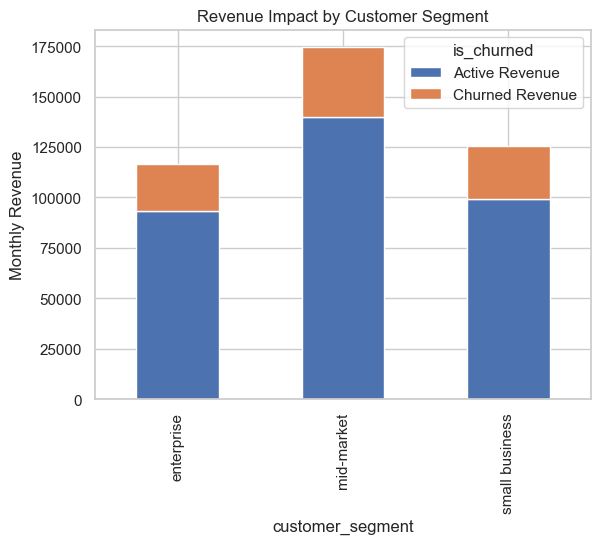

In [314]:
# Plot revenue loss by customer segment
segment_revenue_impact[['Active Revenue', 'Churned Revenue']].plot(kind='bar', stacked=True)
plt.title('Revenue Impact by Customer Segment')
plt.ylabel('Monthly Revenue')
plt.show()

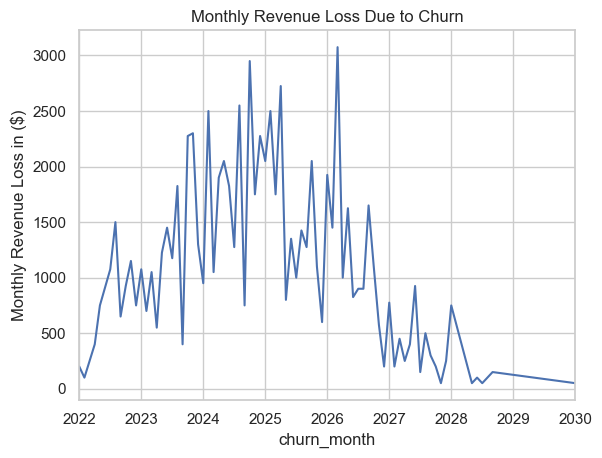

In [315]:
# Plot monthly revenue loss
monthly_revenue_loss.plot(kind='line')
plt.title('Monthly Revenue Loss Due to Churn')
plt.ylabel('Monthly Revenue Loss in ($)')
plt.show()

#### Feature adoption 

##### Exploratory analysis

In [316]:
# Descriptive statistics of feature adoption
feature_adoption_stats = customer['feature_adoption_rate'].describe()
print("Feature Adoption Rate Descriptive Statistics")
display(feature_adoption_stats)

Feature Adoption Rate Descriptive Statistics


count    3000.000000
mean        0.603042
std         0.171681
min         0.300081
25%         0.453377
50%         0.606137
75%         0.749988
max         0.899828
Name: feature_adoption_rate, dtype: float64

In [317]:
# Feature adoption rate by churn status
avg_feature_adoption = customer.groupby('is_churned')['feature_adoption_rate'].mean().reset_index()
avg_feature_adoption.columns = ['Churned', 'Average Feature Adoption Rate']
print("Average Feature Adoption Rate by Churn Status")
display(avg_feature_adoption)

Average Feature Adoption Rate by Churn Status


,Churned,Average Feature Adoption Rate
0,0,0.601846
1,1,0.607642


In [318]:
# Active features vs. Churn analysis
avg_active_features = customer.groupby('is_churned')['active_features'].mean().reset_index()
avg_active_features.columns = ['Churned', 'Average Active Features']
print("Average Number of Active Features by Churn Status")
display(avg_active_features)

Average Number of Active Features by Churn Status


,Churned,Average Active Features
0,0,11.532129
1,1,11.659128


In [319]:
# Feature adoption insights
feature_adoption_summary = pd.DataFrame({
    'Average Feature Adoption Rate (Active)': [avg_feature_adoption[avg_feature_adoption['Churned'] == 0]['Average Feature Adoption Rate'].values[0]],
    'Average Feature Adoption Rate (Churned)': [avg_feature_adoption[avg_feature_adoption['Churned'] == 1]['Average Feature Adoption Rate'].values[0]],
    'Average Active Features (Active)': [avg_active_features[avg_active_features['Churned'] == 0]['Average Active Features'].values[0]],
    'Average Active Features (Churned)': [avg_active_features[avg_active_features['Churned'] == 1]['Average Active Features'].values[0]],
})
print("Feature Adoption Analysis Summary")
display(feature_adoption_summary)

Feature Adoption Analysis Summary


,Average Feature Adoption Rate (Active),Average Feature Adoption Rate (Churned),Average Active Features (Active),Average Active Features (Churned)
0,0.601846,0.607642,11.532129,11.659128


##### Correlation & Plot analysis

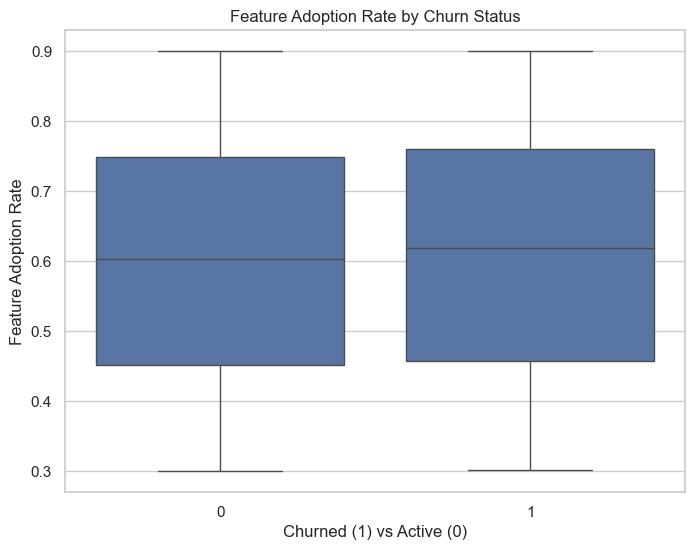

In [320]:
# Distribution of feature adoption rates by churn status
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.boxplot(x='is_churned', y='feature_adoption_rate', data=customer)
plt.title('Feature Adoption Rate by Churn Status')
plt.xlabel('Churned (1) vs Active (0)')
plt.ylabel('Feature Adoption Rate')
plt.show()

In [321]:
# Correlation analysis (Feature adoption vs Other metrics)
correlation_features = customer[['feature_adoption_rate', 'csat_score', 'account_health_score', 'support_tickets', 'seat_utilization_rate', 'is_churned']]
correlation_matrix = correlation_features.corr()
print("Correlation Matrix")
display(correlation_matrix)


Correlation Matrix


,feature_adoption_rate,csat_score,account_health_score,support_tickets,seat_utilization_rate,is_churned
feature_adoption_rate,1.000000,0.005476,0.256261,0.007730,0.022749,0.013666
csat_score,0.005476,1.000000,0.914216,0.053959,-0.011895,-0.418907
account_health_score,0.256261,0.914216,1.000000,-0.113994,-0.011034,-0.407658
support_tickets,0.007730,0.053959,-0.113994,1.000000,-0.001361,-0.030266
seat_utilization_rate,0.022749,-0.011895,-0.011034,-0.001361,1.000000,-0.000069
is_churned,0.013666,-0.418907,-0.407658,-0.030266,-0.000069,1.000000


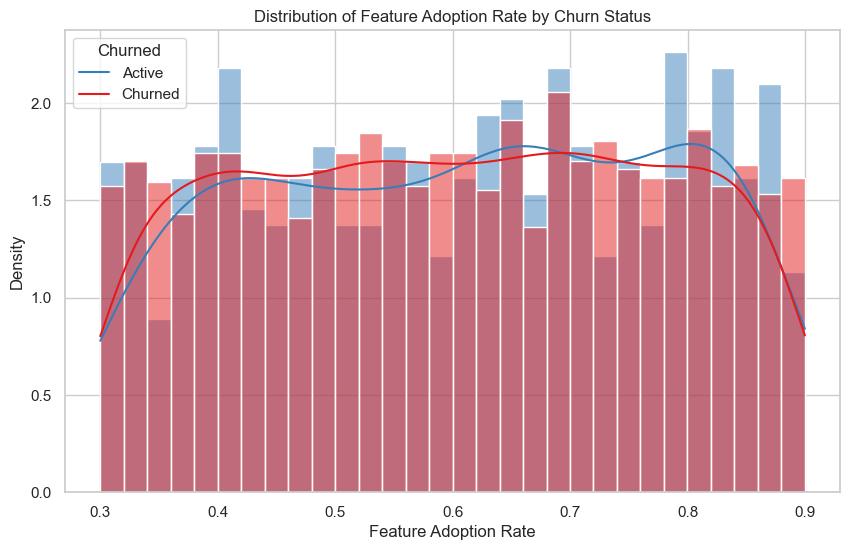

In [322]:
# Feature adoption rate distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=customer, x='feature_adoption_rate', bins=30, kde=True, hue='is_churned', palette='Set1', stat='density', common_norm=False)
plt.title('Distribution of Feature Adoption Rate by Churn Status')
plt.xlabel('Feature Adoption Rate')
plt.ylabel('Density')
plt.legend(title='Churned', labels=['Active', 'Churned'])
plt.show()

In [323]:
# Cross-Tabulation of Feature adoption and Churn
customer['feature_adoption_bin'] = pd.cut(customer['feature_adoption_rate'], bins=5, labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])
feature_churn_crosstab = pd.crosstab(customer['feature_adoption_bin'], customer['is_churned'], normalize='index') * 100
feature_churn_crosstab.columns = ['Active (%)', 'Churned (%)']
print("Churn Rate by Feature Adoption Bins")
display(feature_churn_crosstab)

Churn Rate by Feature Adoption Bins


,Active (%),Churned (%)
feature_adoption_bin,,
Very Low,79.251701,20.748299
Low,80.927835,19.072165
Medium,79.315961,20.684039
High,80.065898,19.934102
Very High,77.339901,22.660099


Average CSAT Score by Churn Status


,Churned,Average CSAT Score
0,0,3.320034
1,1,1.854604


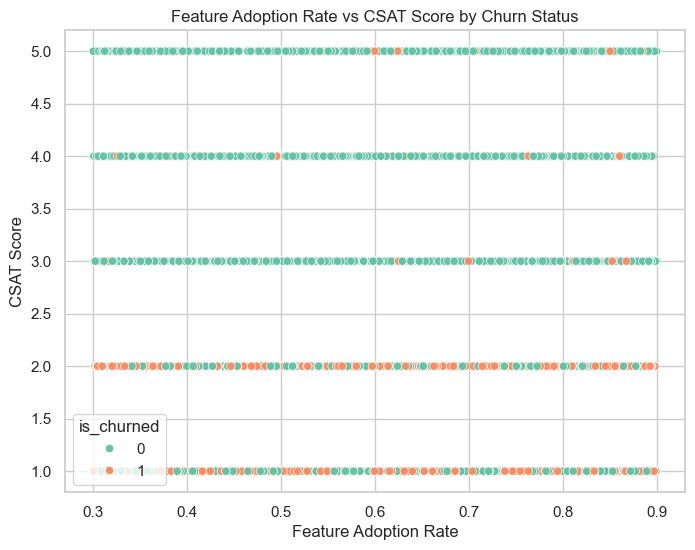

In [324]:
# Relationship between CSAT and feature adoption
csat_by_feature_adoption = customer.groupby('is_churned')['csat_score'].mean().reset_index()
csat_by_feature_adoption.columns = ['Churned', 'Average CSAT Score']
print("Average CSAT Score by Churn Status")
display(csat_by_feature_adoption)
plt.figure(figsize=(8, 6))
sns.scatterplot(x='feature_adoption_rate', y='csat_score', hue='is_churned', data=customer, palette='Set2')
plt.title('Feature Adoption Rate vs CSAT Score by Churn Status')
plt.xlabel('Feature Adoption Rate')
plt.ylabel('CSAT Score')
plt.show()

#### Customer Satisfaction

##### Exploratory analysis

In [325]:
# Correlation between CSAT, Account health, and Churn
satisfaction_correlation_matrix = customer[['csat_score', 'account_health_score', 'is_churned']].corr()

In [326]:
# Average CSAT and Account health for Churned vs Active customers
avg_csat_churned = customer[customer['is_churned'] == 1]['csat_score'].mean()
avg_csat_active = customer[customer['is_churned'] == 0]['csat_score'].mean()
avg_health_churned = customer[customer['is_churned'] == 1]['account_health_score'].mean()
avg_health_active = customer[customer['is_churned'] == 0]['account_health_score'].mean()

In [327]:
# Customer satisfaction segmentation
# Segment customers based on CSAT score
customer['satisfaction_segment'] = pd.cut(
    customer['csat_score'],
    bins=[0, 2, 4, 5],
    labels=['Low Satisfaction', 'Medium Satisfaction', 'High Satisfaction']
)

In [328]:
# Churn rates for each satisfaction segment
satisfaction_segment_churn_rate = (
    customer[customer['is_churned'] == 1]
    .groupby('satisfaction_segment')['customer_id']
    .nunique() /
    customer.groupby('satisfaction_segment')['customer_id']
    .nunique()
) * 100

/var/folders/wc/j84xw3lj0zb22w4z1xdhh17m0000gn/T/ipykernel_94111/479349342.py:3: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

/var/folders/wc/j84xw3lj0zb22w4z1xdhh17m0000gn/T/ipykernel_94111/479349342.py:6: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [329]:
# Average satisfaction and health score for each segment
satisfaction_segment_health_score = customer.groupby('satisfaction_segment')['account_health_score'].mean()

/var/folders/wc/j84xw3lj0zb22w4z1xdhh17m0000gn/T/ipykernel_94111/3555201461.py:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [386]:
# Customer Satisfaction Insights
csat_summary = pd.DataFrame({
    'Avg CSAT Score (Churned Customers)': [avg_csat_churned],
    'Avg CSAT Score (Active Customers)': [avg_csat_active],
    'Avg Health Score (Churned Customers)': [avg_health_churned],
    'Avg Health Score (Active Customers)': [avg_health_active],
    'Low Satisfaction Churn Rate (%)': [satisfaction_segment_churn_rate.get('Low Satisfaction', 0)],
    'Medium Satisfaction Churn Rate (%)': [satisfaction_segment_churn_rate.get('Medium Satisfaction', 0)],
    'High Satisfaction Churn Rate (%)': [satisfaction_segment_churn_rate.get('High Satisfaction', 0)],
    'Avg Health Score (Low Satisfaction)': [satisfaction_segment_health_score.get('Low Satisfaction', 0)],
    'Avg Health Score (Medium Satisfaction)': [satisfaction_segment_health_score.get('Medium Satisfaction', 0)],
    'Avg Health Score (High Satisfaction)': [satisfaction_segment_health_score.get('High Satisfaction', 0)]
})

print("Customer Satisfaction Insights")
display(csat_summary)

Customer Satisfaction Insights


,Avg CSAT Score (Churned Customers),Avg CSAT Score (Active Customers),Avg Health Score (Churned Customers),Avg Health Score (Active Customers),Low Satisfaction Churn Rate (%),Medium Satisfaction Churn Rate (%),High Satisfaction Churn Rate (%),Avg Health Score (Low Satisfaction),Avg Health Score (Medium Satisfaction),Avg Health Score (High Satisfaction)
0,1.854604,3.320034,57.414977,81.054765,44.824708,4.637437,4.383117,51.623836,88.613157,99.984914


### Analysis deep dive

#### Churn reason exploration

##### By frequency, subscriptions types & customer segment

<b>Fig1: Churn reasons frequency</b>

In [331]:
# Ensure 'churn_reason' column is filled for churned customers
churned_customers = customer[customer['is_churned'] == 1].dropna(subset=['churn_reason'])

In [332]:
churn_reason_counts = churned_customers['churn_reason'].value_counts().reset_index()
churn_reason_counts.columns = ['Churn Reason', 'Count']

In [333]:
fig1 = px.bar(
    churn_reason_counts,
    x='Churn Reason',
    y='Count',
    title='Churn Reasons Frequency',
    labels={'Count': 'Number of Customers'},
    text='Count',
    color='Churn Reason',
    color_discrete_sequence=custom_colors2
)

fig1.update_traces(
    hoverinfo='skip',   
    hovertemplate=None
)

fig1.update_layout(
    xaxis_title='<b>Churn Reason</b>',
    yaxis_title='<b>Number of Customers</b>',
    height=500
)

fig1.show()

<b>Fig2: Churn reason by customer segment</b>

In [334]:
churn_reason_segment = churned_customers.groupby(['customer_segment', 'churn_reason'])['customer_id'].nunique().reset_index()
churn_reason_segment.columns = ['Customer Segment', 'Churn Reason', 'Customer Count']

In [335]:
fig2 = px.bar(
    churn_reason_segment,
    x='Customer Segment',
    y='Customer Count',
    color='Churn Reason',
    title='Churn Reasons by Customer Segment',
    barmode='group',
    labels={'Customer Count': 'Number of Customers'},
    color_discrete_sequence=custom_colors2
)

fig2.update_traces(
    texttemplate='%{y}',
    textposition='outside',
    hoverinfo='skip',   
    hovertemplate=None  
)

fig2.update_layout(
    xaxis_title='<b>Customer Segment</b>',
    yaxis_title='<b>Number of Customers</b>',
    legend_title='<b>Churn Reason</b>',
    height=700,
    hovermode=False     # Disables hover interaction
)

fig2.show()


<b>Fig3: Churn reason by subscription type</b>

In [336]:
churn_reason_subscription = churned_customers.groupby(['subscription_type', 'churn_reason'])['customer_id'].nunique().reset_index()
churn_reason_subscription.columns = ['Subscription Type', 'Churn Reason', 'Customer Count']

In [337]:
fig3 = px.bar(
    churn_reason_subscription,
    x='Subscription Type',
    y='Customer Count',
    color='Churn Reason',
    title='Churn Reasons by Subscription Type',
    barmode='group',
    labels={'Customer Count': 'Number of Customers'},
    color_discrete_sequence=custom_colors2
)

for trace in fig3.data:
    # Set the hovertemplate for each trace using trace.name
    trace.hovertemplate = (
        '<b>Subscription Type:</b> %{x}<br>'
        '<b>Churn Reason:</b> ' + str(trace.name) + '<br>'
        '<b>Number of Customers:</b> %{y}<extra></extra>'
    )
    # Add text labels to bars
    trace.texttemplate = '%{y}'
    trace.textposition = 'outside'

fig3.update_layout(
    xaxis_title='<b>Subscription Type</b>',
    yaxis_title='<b>Number of Customers</b>',
    height=500,
    legend_title='<b>Churn Reason</b>'
)

fig3.show()

#### Regional churn drivers

##### Fig4: Churn rates by country

In [338]:
# Total customers per country
total_customers_country = customer.groupby('country')['customer_id'].nunique().reset_index()
total_customers_country.columns = ['Country', 'Total Customers']

In [339]:
# Churned customers per country
churned_customers_country = customer[customer['is_churned'] == 1].groupby('country')['customer_id'].nunique().reset_index()
churned_customers_country.columns = ['Country', 'Churned Customers']

In [340]:
# Merge data
country_churn_data = pd.merge(total_customers_country, churned_customers_country, on='Country', how='left')
country_churn_data['Churned Customers'] = country_churn_data['Churned Customers'].fillna(0)
country_churn_data['Churn Rate (%)'] = (country_churn_data['Churned Customers'] / country_churn_data['Total Customers']) * 100
country_churn_data['Churn Rate (%)'] = country_churn_data['Churn Rate (%)'].round(2)

In [341]:
# Display churn data
print("Churn Rate by Country:")
country_churn_data = country_churn_data.sort_values('Churn Rate (%)', ascending=False)
display(country_churn_data)

Churn Rate by Country:


,Country,Total Customers,Churned Customers,Churn Rate (%)
0,canada,299,77,25.75
3,germany,289,68,23.53
6,sweden,286,62,21.68
4,netherlands,298,61,20.47
7,switzerland,304,61,20.07
1,denmark,326,64,19.63
5,norway,298,58,19.46
2,france,298,57,19.13
8,uk,275,52,18.91
9,usa,327,59,18.04


In [342]:
fig4 = px.choropleth(
    country_churn_data,
    locations='Country',
    locationmode='country names',
    color='Churn Rate (%)',
    hover_name='Country',
    hover_data={
        'Total Customers': True,
        'Churned Customers': True,
        'Churn Rate (%)': True
    },
    title='Churn Rate by Country',
    labels={'Churn Rate (%)': 'Churn Rate (%)'},
    color_continuous_scale=custom_colors2,
)

fig4.update_traces(
    hovertemplate='<b>Country:</b> %{customdata[2]}<br>' +
                  '<b>Total Customers:</b> %{customdata[0]}<br>' +
                  '<b>Churned Customers:</b> %{customdata[1]}<br>' +
                  '<b>Churn Rate (%):</b> %{z:.2f}%<extra></extra>',
    customdata=country_churn_data[['Total Customers', 'Churned Customers', 'Country']].values
)

fig4.update_layout(
    margin=dict(l=0, r=0, t=100, b=0),
    title_x=0.42
)

fig4.show()

##### Fig5: Avg. CSAT vs. churn rate by country

In [343]:
country_scores = customer.groupby('country')[['csat_score', 'account_health_score']].mean().reset_index()
country_scores.columns = ['Country', 'Average CSAT Score', 'Average Account Health Score']
country_analysis = pd.merge(country_churn_data, country_scores, on='Country')
country_analysis[['Average CSAT Score', 'Average Account Health Score']] = country_analysis[['Average CSAT Score', 'Average Account Health Score']].round(2)

In [344]:
print("Regional CSAT and Account health scores:")
country_analysis = country_analysis.sort_values('Churn Rate (%)', ascending=False)
display(country_analysis)


Regional CSAT and Account health scores:


,Country,Total Customers,Churned Customers,Churn Rate (%),Average CSAT Score,Average Account Health Score
0,canada,299,77,25.75,2.90,74.25
1,germany,289,68,23.53,2.93,74.89
2,sweden,286,62,21.68,3.01,75.76
3,netherlands,298,61,20.47,3.10,77.70
4,switzerland,304,61,20.07,2.94,74.16
5,denmark,326,64,19.63,2.97,76.12
6,norway,298,58,19.46,3.12,77.72
7,france,298,57,19.13,3.14,78.24
8,uk,275,52,18.91,3.01,75.79
9,usa,327,59,18.04,3.05,77.03


In [345]:
fig5 = px.scatter(
    country_analysis,
    x='Average CSAT Score',
    y='Churn Rate (%)',
    size='Average Account Health Score',
    color='Country',
    title='Average CSAT Score vs. Churn Rate by Country',
    labels={
        'Average CSAT Score': 'Average CSAT Score',
        'Churn Rate (%)': 'Churn Rate (%)'
    },
    color_discrete_sequence=country_highlight_colors,
    hover_name='Country',
    custom_data=['Total Customers', 'Churned Customers']
)


fig5.update_traces(
    hovertemplate=(
        '<b>Country:</b> %{hovertext}<br>'
        '<b>Average CSAT Score:</b> %{x:.2f}<br>'
        '<b>Churn Rate (%):</b> %{y:.2f}%<br>'
        '<b>Average Account Health Score:</b> %{marker.size:.2f}<br>'
        '<b>Total Customers:</b> %{customdata[0]}<br>'
        '<b>Churned Customers:</b> %{customdata[1]}<extra></extra>'
    )
)

fig5.update_layout(
    title_x=0.5,
    xaxis_title='<b>Average CSAT Score</b>',
    yaxis_title='<b>Churn Rate (%)</b>',
    legend_title='<b>Country</b>',
    margin=dict(l=0, r=0, t=50, b=0)
)

fig5.update_xaxes(
    showticklabels=True,
    tickfont=dict(color='black', size=12, family=font_family),
    range=[
        country_analysis['Average CSAT Score'].min() - 0.5,
        country_analysis['Average CSAT Score'].max() + 0.5
    ]
)
fig5.update_yaxes(
    showticklabels=True,
    tickfont=dict(color='black', size=12, family=font_family),
    range=[
        country_analysis['Churn Rate (%)'].min() - 5,
        country_analysis['Churn Rate (%)'].max() + 5
    ]
)

fig5.show()

#### Impact of contract length and renewal status

##### Fig6: Churn rate by contract length

In [346]:
# Total customers by contract length
total_customers_contract = customer.groupby('contract_length_months')['customer_id'].nunique().reset_index()
total_customers_contract.columns = ['Contract Length (Months)', 'Total Customers']

In [347]:
# Churned customers by contract length
churned_customers_contract = customer[customer['is_churned'] == 1].groupby('contract_length_months')['customer_id'].nunique().reset_index()
churned_customers_contract.columns = ['Contract Length (Months)', 'Churned Customers']

In [348]:
# Merge data
contract_churn_data = pd.merge(total_customers_contract, churned_customers_contract, on='Contract Length (Months)', how='left')
contract_churn_data['Churned Customers'] = contract_churn_data['Churned Customers'].fillna(0)

In [349]:
# Churn rate in %
contract_churn_data['Churn Rate (%)'] = (contract_churn_data['Churned Customers'] / contract_churn_data['Total Customers']) * 100
contract_churn_data['Churn Rate (%)'] = contract_churn_data['Churn Rate (%)'].round(2)

In [350]:
# Sort by contract length
contract_churn_data = contract_churn_data.sort_values('Contract Length (Months)')

In [351]:
print("Churn Rate by Contract Length:")
display(contract_churn_data)

Churn Rate by Contract Length:


,Contract Length (Months),Total Customers,Churned Customers,Churn Rate (%)
0,12,993,200,20.14
1,24,994,220,22.13
2,36,1013,199,19.64


In [352]:
fig6 = px.bar(
    contract_churn_data,
    x='Contract Length (Months)',
    y='Churn Rate (%)',
    title='Churn Rate by Contract Length',
    labels={'Churn Rate (%)': 'Churn Rate (%)'},
    text='Churn Rate (%)',
    color='Contract Length (Months)',
    color_discrete_sequence=custom_colors
)

fig6.update_traces(
    textposition='outside',
    hovertemplate='<b>Contract Length (Months):</b> %{x}<br>' +
                  '<b>Churn Rate (%):</b> %{y:.2f}%<br>' +
                  '<b>Total Customers:</b> %{customdata[0]}<br>' +
                  '<b>Churned Customers:</b> %{customdata[1]}<extra></extra>',
    customdata=contract_churn_data[['Total Customers', 'Churned Customers']].values
)

fig6.update_layout(
    xaxis_title='<b>Contract Length (Months)</b>',
    yaxis_title='<b>Churn Rate (%)</b>',
    legend_title='<b>Contract Length (Months)</b>',
    height=700,
    showlegend=False  # Hide legend if not necessary
)

fig6.show()


##### Churn rate by renewal status

In [353]:
# Total customers by renewal status
total_customers_renewal = customer.groupby('renewal_status')['customer_id'].nunique().reset_index()
total_customers_renewal.columns = ['Renewal Status', 'Total Customers']

In [354]:
# Churned customers by renewal status
churned_customers_renewal = customer[customer['is_churned'] == 1].groupby('renewal_status')['customer_id'].nunique().reset_index()
churned_customers_renewal.columns = ['Renewal Status', 'Churned Customers']

In [355]:
# Merge data
renewal_churn_data = pd.merge(total_customers_renewal, churned_customers_renewal, on='Renewal Status', how='left')
renewal_churn_data['Churned Customers'] = renewal_churn_data['Churned Customers'].fillna(0)

In [356]:
# Churn rate in %
renewal_churn_data['Churn Rate (%)'] = (renewal_churn_data['Churned Customers'] / renewal_churn_data['Total Customers']) * 100
renewal_churn_data['Churn Rate (%)'] = renewal_churn_data['Churn Rate (%)'].round(2)

In [357]:
print("Churn Rate by Renewal Status:")
display(renewal_churn_data)

Churn Rate by Renewal Status:


,Renewal Status,Total Customers,Churned Customers,Churn Rate (%)
0,churned,619,619.0,100.0
1,renewed,2381,0.0,0.0


#### Other metrics

##### Fig7: Churn rate by customer segment and industry

In [358]:
combined_churn = customer.groupby(['industry', 'customer_segment']).apply(
    lambda x: x[x['is_churned'] == 1]['customer_id'].nunique() / x['customer_id'].nunique() * 100
).reset_index()
combined_churn.columns = ['Industry', 'Customer Segment', 'Churn Rate (%)']
combined_churn['Churn Rate (%)'] = combined_churn['Churn Rate (%)'].round(2)

/var/folders/wc/j84xw3lj0zb22w4z1xdhh17m0000gn/T/ipykernel_94111/3234310995.py:1: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



In [359]:
fig7 = px.bar(
    combined_churn,
    x='Industry',
    y='Churn Rate (%)',
    color='Customer Segment',
    barmode='group',
    title='Churn Rate by Industry and Customer Segment',
    labels={'Churn Rate (%)': 'Churn Rate (%)'},
    text='Churn Rate (%)',
    color_discrete_sequence=custom_colors2,
    custom_data=['Customer Segment']  # Pass 'Customer Segment' as custom data
)

fig7.update_traces(
    textposition='outside',
    hoverinfo='skip', 
    hovertemplate=None
)

fig7.update_layout(
    xaxis_title='<b>Industry</b>',
    yaxis_title='<b>Churn Rate (%)</b>',
    legend_title='<b>Customer Segment</b>',
    height=500
)
fig7.show()

##### Fig8: Monthly churn rate over time

In [360]:
customer['signup_date'] = pd.to_datetime(customer['signup_date'])
customer['churn_date'] = pd.to_datetime(customer['churn_date'])

In [361]:
# Extract month and year for analysis
customer['signup_month'] = customer['signup_date'].dt.to_period('M')
customer['churn_month'] = customer['churn_date'].dt.to_period('M')

In [362]:
# Cumulative total customers per month
monthly_total_customers = customer.groupby('signup_month')['customer_id'].nunique().cumsum().reset_index()
monthly_total_customers.columns = ['Month', 'Cumulative Customers']

In [363]:
# Churned customers per month
monthly_churned_customers = customer[customer['is_churned'] == 1].groupby('churn_month')['customer_id'].nunique().reset_index()
monthly_churned_customers.columns = ['Month', 'Churned Customers']

In [364]:
# Merge data
monthly_churn_data = pd.merge(
    monthly_total_customers,
    monthly_churned_customers,
    on='Month',
    how='left'
)
monthly_churn_data['Churned Customers'] = monthly_churn_data['Churned Customers'].fillna(0)

In [365]:
# Churn rate in %
monthly_churn_data['Churn Rate (%)'] = (monthly_churn_data['Churned Customers'] / monthly_churn_data['Cumulative Customers']) * 100
monthly_churn_data['Churn Rate (%)'] = monthly_churn_data['Churn Rate (%)'].round(2)

In [366]:
monthly_churn_data['Month'] = monthly_churn_data['Month'].dt.to_timestamp()

In [367]:
fig8 = px.line(
    monthly_churn_data,
    x='Month',
    y='Churn Rate (%)',
    title='Monthly Churn Rate Over Time',
    labels={'Month': 'Month', 'Churn Rate (%)': 'Churn Rate (%)'},
    markers=True,
    color_discrete_sequence=custom_colors4
)

fig8.update_traces(
    hovertemplate='<b>Month:</b> %{x|%b %Y}<br>' +
                  '<b>Churn Rate (%):</b> %{y:.2f}%<br>' +
                  '<b>Cumulative Customers:</b> %{customdata[0]}<br>' +
                  '<b>Churned Customers:</b> %{customdata[1]}<extra></extra>',
    customdata=monthly_churn_data[['Cumulative Customers', 'Churned Customers']].values
)

fig8.update_layout(
    xaxis_title='<b>Month</b>',
    yaxis_title='<b>Churn Rate (%)</b>'
)

fig8.show()

#### Feature adoption & retention

##### Fig9: Feature adoption rate vs. CSAT

In [368]:
feature_data = customer[['customer_id', 'feature_adoption_rate', 'csat_score', 'is_churned']]

In [369]:
# Correlation between feature adoption rate and CSAT score
correlation_adoption_csat, p_value_adoption_csat = stats.pearsonr(feature_data['feature_adoption_rate'], feature_data['csat_score'])

In [370]:
print(f"Correlation between Feature Adoption Rate and CSAT Score: {correlation_adoption_csat:.2f} (p-value: {p_value_adoption_csat:.4f})")

Correlation between Feature Adoption Rate and CSAT Score: 0.01 (p-value: 0.7643)


In [371]:
# Average feature adoption rate for churned vs. retained customers
average_adoption_churn = feature_data.groupby('is_churned')['feature_adoption_rate'].mean().reset_index()
average_adoption_churn['Churn Status'] = average_adoption_churn['is_churned'].map({0: 'Retained', 1: 'Churned'})
average_adoption_churn.rename(columns={'feature_adoption_rate': 'Average Feature Adoption Rate'}, inplace=True)

In [372]:
fig9 = px.scatter(
    feature_data,
    x='feature_adoption_rate',
    y='csat_score',
    color='is_churned',
    color_discrete_map=custom_colors2,
    title='Feature Adoption Rate vs. CSAT Score',
    labels={
        'feature_adoption_rate': 'Feature Adoption Rate (%)',
        'csat_score': 'CSAT Score',
        'is_churned': 'Churn Status'
    },
    hover_data={'customer_id': True},
    template='custom_template'
)

fig9.update_traces(
    hovertemplate='<b>Customer ID:</b> %{customdata[0]}<br>' +
                  '<b>Feature Adoption Rate (%):</b> %{x:.2f}%<br>' +
                  '<b>CSAT Score:</b> %{y}<br>' +
                  '<b>Churn Status:</b> %{marker.color}<extra></extra>',
    customdata=feature_data[['customer_id']].values
)

fig9.update_layout(
    coloraxis_colorbar=dict(
        title='<b>Churn Status</b>',
        tickvals=[0, 1],
        ticktext=['Retained', 'Churned']
    ),
    xaxis_title='<b>Feature Adoption Rate (%)</b>',
    yaxis_title='<b>CSAT Score</b>'
)

fig9.show()

##### Fig10: Avg. CLV by customer segment

In [373]:
# Calculate average CLV by customer segment
clv_by_segment = customer.groupby('customer_segment')['clv'].mean().reset_index()
clv_by_segment.columns = ['Customer Segment', 'Average CLV']
clv_by_segment['Average CLV'] = clv_by_segment['Average CLV'].round(2)

In [374]:
fig10 = px.bar(
    clv_by_segment,
    x='Customer Segment',
    y='Average CLV',
    title='Average CLV by Customer Segment',
    text='Average CLV',
    color='Customer Segment',
    color_discrete_sequence=custom_colors3,
    template='custom_template'
)

fig10.update_traces(
    textposition='outside',
    hovertemplate='<b>Customer Segment:</b> %{x}<br>' +
                  '<b>Average CLV:</b> $%{y:.2f}<extra></extra>'
)

fig10.update_layout(
    xaxis_title='<b>Customer Segment</b>',
    yaxis_title='<b>Average CLV ($)</b>',
    height=600,
    showlegend=False
)

fig10.show()

##### Fig11: Feature adoption rate over time

In [375]:
# Ensure 'signup_date' is in datetime format
customer['signup_date'] = pd.to_datetime(customer['signup_date'])

In [376]:
# Extract month and year from 'signup_date'
customer['signup_month'] = customer['signup_date'].dt.to_period('M')

In [377]:
# Average feature adoption rate per month
monthly_feature_adoption = customer.groupby('signup_month')['feature_adoption_rate'].mean().reset_index()
monthly_feature_adoption.columns = ['Month', 'Average Feature Adoption Rate']
monthly_feature_adoption['Average Feature Adoption Rate'] = monthly_feature_adoption['Average Feature Adoption Rate'] * 100  # Convert to percentage

In [378]:
# Convert 'Month' to datetime for plotting
monthly_feature_adoption['Month'] = monthly_feature_adoption['Month'].dt.to_timestamp()

In [379]:
fig11 = px.line(
    monthly_feature_adoption,
    x='Month',
    y='Average Feature Adoption Rate',
    title='Average Feature Adoption Rate Over Time',
    labels={'Month': 'Month', 'Average Feature Adoption Rate': 'Average Feature Adoption Rate (%)'},
    markers=True,
    color_discrete_sequence=custom_colors4,
    template='custom_template'
)

# Update hover template
fig11.update_traces(
    hovertemplate='<b>Month:</b> %{x|%b %Y}<br>' +
                  '<b>Average Feature Adoption Rate:</b> %{y:.2f}%<extra></extra>'
)

# Update layout
fig11.update_layout(
    xaxis_title='<b>Month</b>',
    yaxis_title='<b>Average Feature Adoption Rate (%)</b>'
)

# Display the plot
fig11.show()

#### BI analysis

##### fig13: Total monthly revenue over time

In [380]:
customer['signup_date'] = pd.to_datetime(customer['signup_date'])
# Extract month and year from 'signup_date'
customer['signup_month'] = customer['signup_date'].dt.to_period('M')

In [381]:
# Total revenue per month
monthly_revenue = customer.groupby('signup_month')['monthly_revenue'].sum().reset_index()
monthly_revenue.columns = ['Month', 'Total Revenue']

In [382]:
# Convert 'Month' to datetime for plotting
monthly_revenue['Month'] = monthly_revenue['Month'].dt.to_timestamp()

In [387]:
fig13 = px.line(
    monthly_revenue,
    x='Month',
    y='Total Revenue',
    title='Total Monthly Revenue Over Time',
    labels={'Month': 'Month', 'Total Revenue': 'Total Revenue ($)'},
    markers=True,
    color_discrete_sequence=custom_colors4,
    template='custom_template'
)

fig13.update_traces(
    hovertemplate='<b>Month:</b> %{x|%b %Y}<br>' +
                  '<b>Total Revenue:</b> $%{y:.2f}<extra></extra>'
)

fig13.update_layout(
    xaxis_title='<b>Month</b>',
    yaxis_title='<b>Total Revenue ($)</b>'
)

fig13.show()

##### Fig13: Revenue by customer segment

In [384]:
# Ensure 'signup_date' and 'churn_date' are in datetime format
customer['signup_date'] = pd.to_datetime(customer['signup_date'])
customer['churn_date'] = pd.to_datetime(customer['churn_date'])

# Extract month and year from 'signup_date' and 'churn_date'
customer['signup_month'] = customer['signup_date'].dt.to_period('M')
customer['churn_month'] = customer['churn_date'].dt.to_period('M')

# Calculate total revenue per month
total_revenue_monthly = customer.groupby('signup_month')['monthly_revenue'].sum().reset_index()
total_revenue_monthly.columns = ['Month', 'Total Revenue']

# Calculate revenue by customer segment per month
revenue_by_segment = customer.groupby(['signup_month', 'customer_segment'])['monthly_revenue'].sum().reset_index()
revenue_by_segment.columns = ['Month', 'Customer Segment', 'Revenue']

# Pivot the data for stacked bar chart
revenue_pivot = revenue_by_segment.pivot(index='Month', columns='Customer Segment', values='Revenue').fillna(0)

# Calculate revenue lost due to churn per month
revenue_lost = customer[customer['is_churned'] == 1].groupby('churn_month')['monthly_revenue'].sum().reset_index()
revenue_lost.columns = ['Month', 'Revenue Lost']

# Merge total revenue with revenue lost
combined_revenue = pd.merge(total_revenue_monthly, revenue_lost, left_on='Month', right_on='Month', how='left')
combined_revenue['Revenue Lost'] = combined_revenue['Revenue Lost'].fillna(0)

# Convert 'Month' to datetime for plotting
combined_revenue['Month'] = combined_revenue['Month'].dt.to_timestamp()

In [388]:
fig13 = go.Figure()

# Add traces for each customer segment
for segment in revenue_pivot.columns:
    fig13.add_trace(
        go.Bar(
            name=segment,
            x=combined_revenue['Month'],
            y=revenue_pivot[segment],
            text=revenue_pivot[segment],
            textposition='auto',
            hovertemplate='<b>Month:</b> %{x|%b %Y}<br>' +
                          '<b>Customer Segment:</b> ' + segment + '<br>' +
                          '<b>Revenue:</b> $%{y:.2f}<extra></extra>',
            marker_color=custom_colors2[revenue_pivot.columns.get_loc(segment) % len(custom_colors4)]
        )
    )


fig13.add_trace(
    go.Scatter(
        name='Revenue Lost',
        x=combined_revenue['Month'],
        y=combined_revenue['Revenue Lost'],
        mode='lines+markers',
        marker=dict(color='#FF6666', size=8),
        line=dict(color='#FFCCCC', width=2),
        hovertemplate='<b>Month:</b> %{x|%b %Y}<br>' +
                      '<b>Revenue Lost:</b> $%{y:.2f}<extra></extra>',
        yaxis='y2'
    )
)

fig13.update_layout(
    title='Total Revenue and Revenue by Customer Segment Over Time',
    xaxis=dict(title='<b>Month</b>'),
    yaxis=dict(
        title='<b>Total Revenue ($)</b>',
        side='left',
        showgrid=True,
        zeroline=True
    ),
    
    yaxis2=dict(
        title='<b>Revenue Lost ($)</b>',
        overlaying='y',
        side='right',
        showgrid=False,
        zeroline=True
    ),
    
    barmode='stack',
    legend=dict(
        orientation='h',        
        yanchor='bottom',
        y=-0.2,                 # Position below the chart
        xanchor='center',
        x=0.5
    ),
    
    template='custom_template',
    margin=dict(l=50, r=50, t=100, b=100),  # Increased bottom margin for legend
    height=700                              
)

fig13.show()